In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
# Loading Dataset:

layoffs = pd.read_csv("layoffs2.csv")
layoffs.head(10)

,sno,Company,Layoffs,Year,Country,WorkForce (%)
0,1,Accenture,19000,2023,Globally,2.5
1,12,Google,12000,2023,Globally,6.0
2,15,Meta,11000,2022,Globally,13.0
3,11,Meta,10000,2023,Globally,NaN
4,13,Microsoft,10000,2023,Globally,5.0
5,16,Amazon,10000,2022,Globally,3.0
6,14,Amazon,9000,2023,Globally,NaN
7,27,Ericsson,8500,2023,Globally,8.0
8,10,Amazon,8000,2023,Globally,2.0
9,28,Salesforce,8000,2023,Globally,10.0


In [3]:
layoffs.tail(10)

,sno,Company,Layoffs,Year,Country,WorkForce (%)
40,40,Skit.AI,115,2023,India,NaN
41,24,Livspace,100,2023,India,2.0
42,39,Zomato,100,2022,India,NaN
43,43,Cashfree Payments,100,2023,India,NaN
44,33,FarEye,90,2023,India,12.0
45,29,Dukaan,56,2023,India,30.0
46,32,Pocket Aces,50,2023,India,25.0
47,34,Relevel,40,2023,India,20.0
48,35,Bounce,40,2023,India,5.0
49,25,Smallcase,15,2023,India,4.0


In [4]:
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sno            50 non-null     int64  
 1   Company        50 non-null     object 
 2   Layoffs        50 non-null     int64  
 3   Year           50 non-null     int64  
 4   Country        50 non-null     object 
 5   WorkForce (%)  29 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ KB


In [5]:
# Dropping Serial Number Column because it is not useful for our analysis

layoffs = layoffs.drop(["sno"], axis = 1)

layoffs.head()

,Company,Layoffs,Year,Country,WorkForce (%)
0,Accenture,19000,2023,Globally,2.5
1,Google,12000,2023,Globally,6.0
2,Meta,11000,2022,Globally,13.0
3,Meta,10000,2023,Globally,NaN
4,Microsoft,10000,2023,Globally,5.0


In [6]:
# Creating a Pivot Table

pt = pd.pivot_table(layoffs, values = ["Company", "Layoffs", "Year", "Country"], index = "Company", aggfunc = max)

In [7]:
pt.head()

,Country,Layoffs,WorkForce (%),Year
Company,,,,
Accenture,Globally,19000,2.5,2023
Amazon,Globally,10000,3.0,2023
Blinkit,India,1600,NaN,2022
Bounce,India,40,5.0,2023
Byju's,India,2500,5.0,2023


In [8]:
total_layoff = layoffs.groupby('Company', as_index = False).sum()[['Company', 'Layoffs']]
total_layoff.head()

,Company,Layoffs
0,Accenture,19000
1,Amazon,27000
2,Blinkit,1600
3,Bounce,40
4,Byju's,4000


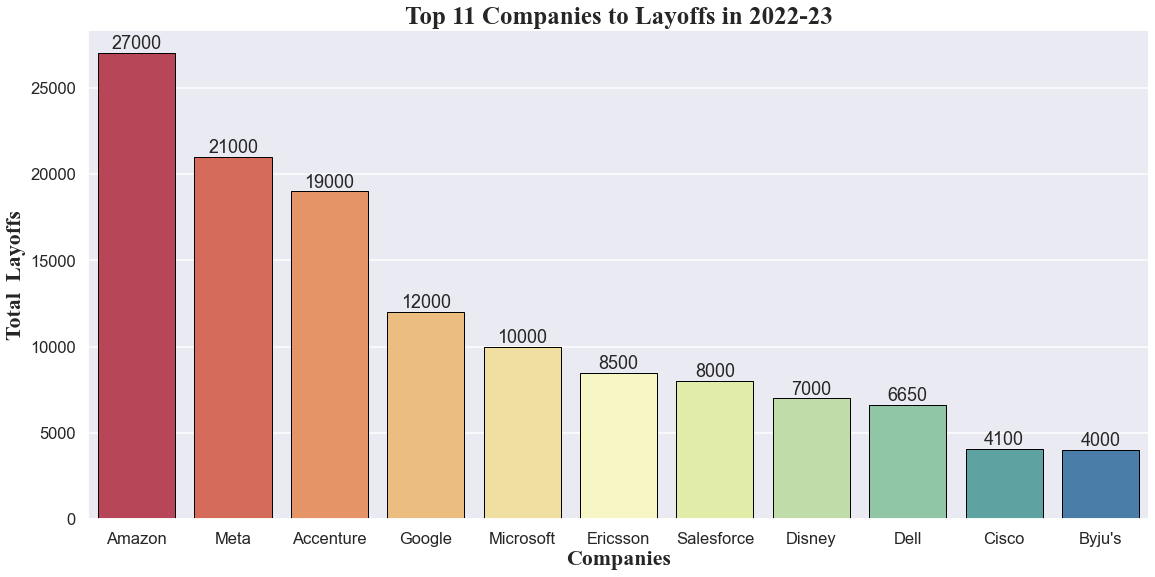

In [9]:
# Top 11 Companies to Layoff:

top_10 = total_layoff.groupby(by = 'Company').max()[['Layoffs']].sort_values(by = ['Layoffs'], ascending = False).reset_index()
fig = plt.figure(figsize = (19,9))
sns.set(style = "darkgrid", context = 'talk')
plt.title("Top 11 Companies to Layoffs in 2022-23", size = 25, fontname="Times New Roman", fontweight="bold")
ax = sns.barplot(data = top_10.iloc[:11], y = "Layoffs", x = "Company",  palette = 'Spectral', linewidth = 1, edgecolor = 'black')

plt.xlabel("Companies", fontname="Times New Roman", fontweight="bold", fontsize = "22")
plt.ylabel("Total  Layoffs", fontname="Times New Roman", fontweight="bold", fontsize = "22")

for i in ax.containers:
    ax.bar_label(i,)

# to save plot write this before plt.show()
plt.savefig('Top_11_Companies_Layoffs.jpg', dpi = 300)

plt.show()

Note: This data is based on Layoff Tracker Website: https://layoffs.fyi/

Amazon has the highest number of total layoffs i.e, 27000 globally which is done in 3 phases: 
   1st phase 10000 layoffs in Nov 2022,
   2nd phase  8000 layoffs in Jan 2023,
   3rd phase  9000 layoffs in Mar 2023  
(many publications combine 1st and 2nd phase as one) followed by Meta, Accenture, Google, Microsoft. 

Accenture announced that they will layoff 2.5% of the global workforce in the span of 18 months but
40% of Accenture Workforce operates from India so we could see fairly large number of layoffs from India.
In this top 10 companies, only Byju's is the Indian Company.

Byju's is one of the Top EdTech Company from India which laid off 
around 4000 people, highest in any Indian Company. This layoffs are done in 2 phases:
   1st phase 2500 layoffs in Oct 2022,
   2nd phase 1500 layoffs in Feb 2023
latest round of layoff from Byju's is after Byju's deciding to "Outsource" some functions in areas like:
   logistics, customer care, engineering, sales, marketing etc. 
   
Every companies have different reasons but some common points being Economic Slowdown due to Covid-19, 
Overhiring, maybe Ukraine-Russia War. 
Due to rising inflation in the majority of countries, these businesses are 
concerned about a possible economic recession.


In [10]:
# Count the Total Number of Companies in India and Globally in this list:

layoffs_counts = layoffs.Country.value_counts()
layoffs_counts

India       29
Globally    21
Name: Country, dtype: int64

In [11]:
# Show only Indian Companies:

Indian_comp = layoffs[layoffs.Country == 'India'].groupby('Company', as_index = False).sum()[['Company', 'Layoffs']]
Indian_comp.head()

,Company,Layoffs
0,Blinkit,1600
1,Bounce,40
2,Byju's,4000
3,Captain Fresh,123
4,Cars24,600


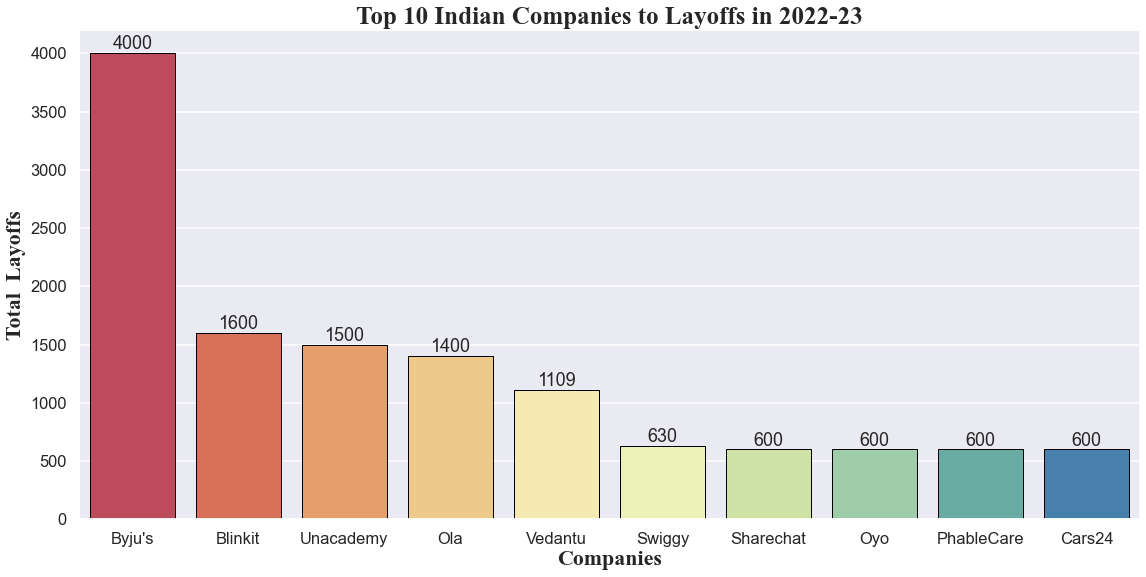

In [12]:
# Top 10 Indian Companies to Layoffs:

top_10_india = Indian_comp.groupby(by = 'Company').max()[['Layoffs']].sort_values(by = ['Layoffs'], ascending = False).reset_index()
fig = plt.figure(figsize = (19,9))
sns.set(style = "darkgrid", context = 'talk')
plt.title("Top 10 Indian Companies to Layoffs in 2022-23", size = 25, fontname="Times New Roman", fontweight="bold")
ax = sns.barplot(data = top_10_india.iloc[:10], y = "Layoffs", x = "Company",  palette = 'Spectral', linewidth = 1, edgecolor = 'black')

plt.xlabel("Companies", fontname="Times New Roman", fontweight="bold", fontsize = "22")
plt.ylabel("Total  Layoffs", fontname="Times New Roman", fontweight="bold", fontsize = "22")

for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('Top_10_Indian_Companies_Layoffs.jpg', dpi = 300)

plt.show()

In [13]:
# Show Company and Layoffs only in 2022:

specific = layoffs[layoffs.Country == 'Globally'].groupby('Company', as_index = False).sum()[['Company', 'Layoffs']]
specific.head()

,Company,Layoffs
0,Accenture,19000
1,Amazon,27000
2,Cisco,4100
3,Dell,6650
4,Disney,7000


In [14]:
# Number of Rounds Company layoffs during 2022-23:

L_round = layoffs.Company.value_counts()
L_round

Amazon               3
Byju's               2
Meta                 2
Swiggy               2
Twitter              2
Accenture            1
Twitch               1
SAP Labs             1
Pristyn Care         1
Medibuddy            1
Exotel               1
Captain Fresh        1
Upgrad               1
Livspace             1
Skit.AI              1
Spotify              1
Zomato               1
Cashfree Payments    1
FarEye               1
Dukaan               1
Pocket Aces          1
Relevel              1
Bounce               1
Wipro                1
Sharechat            1
PhableCare           1
SAP                  1
Microsoft            1
Ericsson             1
Salesforce           1
Disney               1
Dell                 1
Cisco                1
IBM                  1
Seagate              1
Google               1
Indeed               1
Blinkit              1
Unacademy            1
Ola                  1
Vedantu              1
Cars24               1
Oyo                  1
Smallcase  

In [15]:
pt.head()

,Country,Layoffs,WorkForce (%),Year
Company,,,,
Accenture,Globally,19000,2.5,2023
Amazon,Globally,10000,3.0,2023
Blinkit,India,1600,NaN,2022
Bounce,India,40,5.0,2023
Byju's,India,2500,5.0,2023


In [16]:
pt2 = pd.pivot_table(layoffs, values = "Layoffs", index = "Company", aggfunc = 'count')
pt2.head()

,Layoffs
Company,
Accenture,1
Amazon,3
Blinkit,1
Bounce,1
Byju's,2


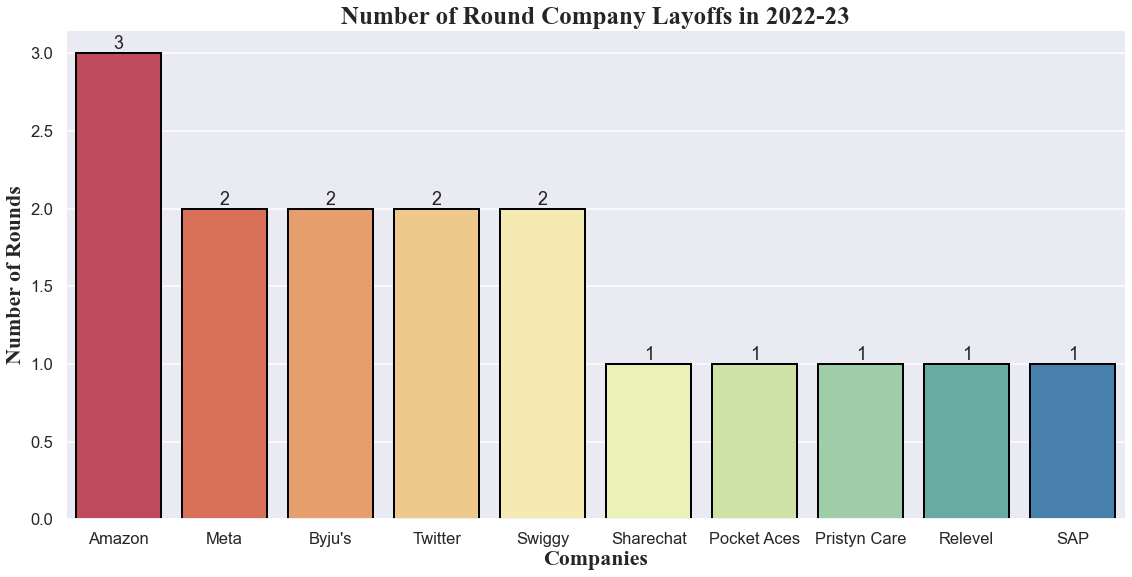

In [17]:
# Plotting top 10 Number of Rounds Company layoffs during 2022-23:

top_10_round = pt2.groupby(by = 'Company').max()[['Layoffs']].sort_values(by = ['Layoffs'], ascending = False).reset_index()
fig = plt.figure(figsize = (19,9))
sns.set(style = "darkgrid", context = 'talk')
plt.title("Number of Round Company Layoffs in 2022-23", size = 25, fontname="Times New Roman", fontweight="bold")
ax = sns.barplot(data = top_10_round.iloc[:10], y = "Layoffs", x = "Company",  palette = 'Spectral', linewidth = 2, edgecolor = 'black')

plt.xlabel("Companies", fontname="Times New Roman", fontweight="bold", fontsize = "22")
plt.ylabel("Number of Rounds", fontname="Times New Roman", fontweight="bold", fontsize = "22")


for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('Top 10 Number of Round Company Layoffs in 2022-23.jpg', dpi = 300)

plt.show()

In [18]:
pt3 = pd.pivot_table(layoffs, values = "Year", index = "Company", aggfunc = 'count')
pt3.head()

,Year
Company,
Accenture,1
Amazon,3
Blinkit,1
Bounce,1
Byju's,2


In [19]:
layoffs.head()

,Company,Layoffs,Year,Country,WorkForce (%)
0,Accenture,19000,2023,Globally,2.5
1,Google,12000,2023,Globally,6.0
2,Meta,11000,2022,Globally,13.0
3,Meta,10000,2023,Globally,NaN
4,Microsoft,10000,2023,Globally,5.0


In [20]:
# Layoffs in 2023

layoffs_23 = pd.read_csv('layoffs3.csv')
layoffs_23.head()

,sno,Company,Layoffs,Year,Country,WorkForce
0,1,Accenture,19000,2023,Globally,2.5
1,12,Google,12000,2023,Globally,6.0
2,11,Meta,10000,2023,Globally,NaN
3,13,Microsoft,10000,2023,Globally,5.0
4,14,Amazon,9000,2023,Globally,NaN


In [21]:
layoffs_23 = layoffs_23.drop(["sno"], axis = 1)
layoffs_23.head()

,Company,Layoffs,Year,Country,WorkForce
0,Accenture,19000,2023,Globally,2.5
1,Google,12000,2023,Globally,6.0
2,Meta,10000,2023,Globally,NaN
3,Microsoft,10000,2023,Globally,5.0
4,Amazon,9000,2023,Globally,NaN


In [22]:
total_layoff_2023 = layoffs_23.groupby('Company', as_index = False).sum()[['Company', 'Layoffs']]
total_layoff_2023.head()

,Company,Layoffs
0,Accenture,19000
1,Amazon,17000
2,Bounce,40
3,Byju's,1500
4,Captain Fresh,123


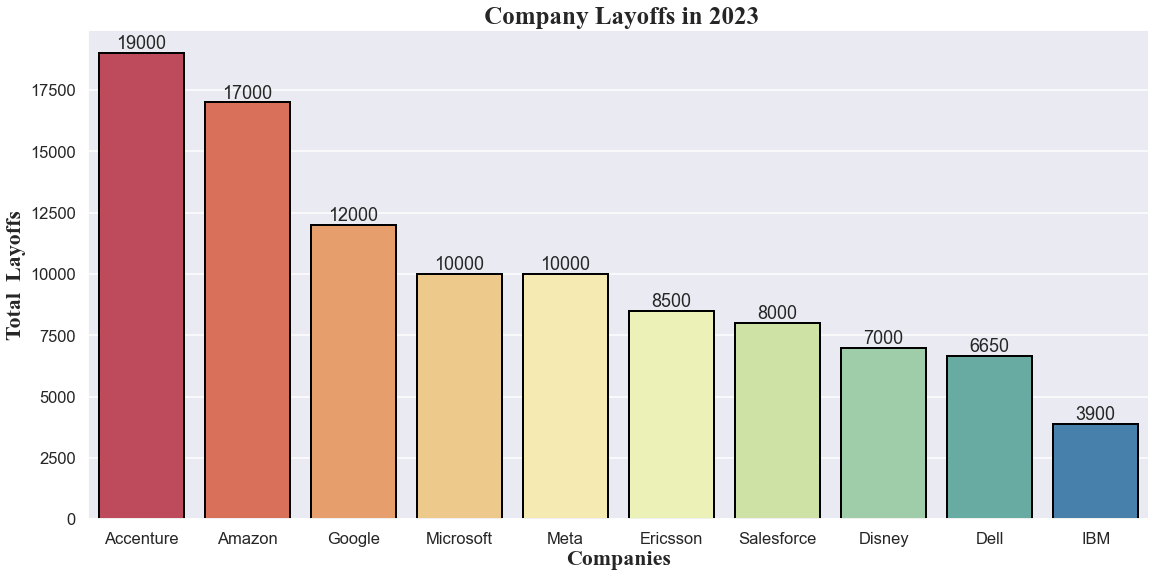

In [23]:
# Plotting top 10 Layoffs in 2023:

top_10_2023 = total_layoff_2023.groupby(by = 'Company').max()[['Layoffs']].sort_values(by = ['Layoffs'], ascending = False).reset_index()
fig = plt.figure(figsize = (19,9))
sns.set(style = "darkgrid", context = 'talk')
plt.title(" Company Layoffs in 2023", size = 25, fontname="Times New Roman", fontweight="bold")
ax = sns.barplot(data = top_10_2023.iloc[:10], y = "Layoffs", x = "Company",  palette = 'Spectral', linewidth = 2, edgecolor = 'black')

plt.xlabel("Companies", fontname="Times New Roman", fontweight="bold", fontsize = "22")
plt.ylabel("Total  Layoffs", fontname="Times New Roman", fontweight="bold", fontsize = "22")

for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('Top 10 Company Layoffs in 2023.jpg', dpi = 300)

plt.show()